## Data Ingestion

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_09_10 = pd.read_excel('/content/drive/MyDrive/ML/Jobs/Decathlon/customer_transactions_sample.xlsx',sheet_name='Year 2009-2010')
df_09_10.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df_09_10.shape

(525461, 8)

In [4]:
df_10_11 = pd.read_excel('/content/drive/MyDrive/ML/Jobs/Decathlon/customer_transactions_sample.xlsx',sheet_name='Year 2010-2011')
df_10_11.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df_10_11.shape

(541910, 8)

## Data Transformation
- Combine individual data for both the years
- Removal of Duplicate records
- Extract features 'year','year-quarter','quarter' & 'month' from InvoiceDate

In [6]:
df_combined= pd.concat([df_09_10,df_10_11],ignore_index=True)
df_combined.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df_combined.shape

(1067371, 8)

In [8]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### Remove duplicate records
- Out of the 1067371 total records, 34335 were duplicate which when removed leaves us with 1033036 unique records.

In [9]:
df_combined=df_combined.drop_duplicates(keep='first').reset_index().rename(columns={'index':'record_id'})
df_combined.head()

,record_id,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df_combined.shape

(1033036, 9)

In [11]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033036 entries, 0 to 1033035
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record_id    1033036 non-null  int64         
 1   Invoice      1033036 non-null  object        
 2   StockCode    1033036 non-null  object        
 3   Description  1028761 non-null  object        
 4   Quantity     1033036 non-null  int64         
 5   InvoiceDate  1033036 non-null  datetime64[ns]
 6   Price        1033036 non-null  float64       
 7   Customer ID  797885 non-null   float64       
 8   Country      1033036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 70.9+ MB


## Feature Engineering
- Extract features 'year','year-quarter','quarter' & 'month' from InvoiceDate
- Add sales data

### Add 'year','year-quarter','quarter' & 'month'

In [12]:
df_combined['invoice_year'] = df_combined['InvoiceDate'].dt.year.astype(int)
df_combined['invoice_month'] = df_combined['InvoiceDate'].dt.month.astype(int)
df_combined['invoice_quarter'] = df_combined['InvoiceDate'].dt.quarter.astype(int)
df_combined['invoice_yr_quarter'] = df_combined['InvoiceDate'].dt.year.astype(str)+ " Q-"+ df_combined['InvoiceDate'].dt.quarter.astype(str)

In [13]:
df_combined.head(2)

,record_id,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice_year,invoice_month,invoice_quarter,invoice_yr_quarter
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,4,2009 Q-4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,4,2009 Q-4


In [14]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033036 entries, 0 to 1033035
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   record_id           1033036 non-null  int64         
 1   Invoice             1033036 non-null  object        
 2   StockCode           1033036 non-null  object        
 3   Description         1028761 non-null  object        
 4   Quantity            1033036 non-null  int64         
 5   InvoiceDate         1033036 non-null  datetime64[ns]
 6   Price               1033036 non-null  float64       
 7   Customer ID         797885 non-null   float64       
 8   Country             1033036 non-null  object        
 9   invoice_year        1033036 non-null  int64         
 10  invoice_month       1033036 non-null  int64         
 11  invoice_quarter     1033036 non-null  int64         
 12  invoice_yr_quarter  1033036 non-null  object        
dtypes: datetime6

### Add Sales data

In [15]:
df_combined['sales']= df_combined['Quantity']*df_combined['Price']

In [16]:
df_combined.head(2)

,record_id,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice_year,invoice_month,invoice_quarter,invoice_yr_quarter,sales
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,4,2009 Q-4,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,4,2009 Q-4,81.0


## EDA & Transformation

###  Null values and its impact

1. Columns 'Description' & 'Customer ID' have missing values.
2. 'Decription' column is not very crucial for this case study on preliminary analysis so we can ignore it.
3. Out of the total 53628 unique invoices 8752 have missing customer id which is (~16%) of data.
4. Just from record point 235151 out of 1033036 unique records i.e. (~22.7%) have missing Customer ID.

In [17]:
df_combined.isnull().sum()

record_id                  0
Invoice                    0
StockCode                  0
Description             4275
Quantity                   0
InvoiceDate                0
Price                      0
Customer ID           235151
Country                    0
invoice_year               0
invoice_month              0
invoice_quarter            0
invoice_yr_quarter         0
sales                      0
dtype: int64

In [18]:
len(df_combined['Invoice'].unique())

53628

In [19]:
len(df_combined['Invoice'][df_combined['Customer ID'].isna()].unique())

8752

Customer ID missing for following percent of invoices

In [20]:
len(df_combined['Invoice'][df_combined['Customer ID'].isna()].unique()) *100 / len(df_combined['Invoice'].unique())

16.319832923099874

In [21]:
# df_combined.groupby(['Invoice']).agg({'Customer ID':'nunique'}).reset_index().rename(columns={'Customer ID':'unique_cust'}).sort_values('unique_cust'
# , ascending=False)

Since each invoice and customer id have many to one relation i.e. many invoices can belong to a single customer but each invoice will have only 1 customer id. Lets check if Customer ID is uniformly missing for same Invoice ID across all data.

In [22]:
invoice_customer_df= df_combined[['Invoice','Customer ID']].dropna().drop_duplicates(keep='first').rename(columns={'Customer ID':'cust_id'})
invoice_customer_df

,Invoice,cust_id
0,489434,13085.0
8,489435,13085.0
12,489436,13078.0
31,489437,15362.0
54,489438,18102.0
...,...,...
1032991,581583,13777.0
1032993,581584,13777.0
1032995,581585,15804.0
1033016,581586,13113.0


In [23]:
df_combined=df_combined.merge(invoice_customer_df, how='left', on='Invoice')
df_combined.head()

,record_id,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice_year,invoice_month,invoice_quarter,invoice_yr_quarter,sales,cust_id
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,4,2009 Q-4,83.4,13085.0
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,4,2009 Q-4,81.0,13085.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,4,2009 Q-4,81.0,13085.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,4,2009 Q-4,100.8,13085.0
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,4,2009 Q-4,30.0,13085.0


In [24]:
df_combined[(df_combined['Customer ID'].isna() & df_combined['cust_id'].notna())]

,record_id,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice_year,invoice_month,invoice_quarter,invoice_yr_quarter,sales,cust_id


As you can see Customer ID is uniformly missing for same Invoice ID across all data , we will be removing the temporary column 'cust_id'.

In [25]:
df_combined.drop(columns=['cust_id'], inplace=True)

#### Analysis on missing data

In [26]:
df_missing_customer= df_combined[df_combined['Customer ID'].isna()].reset_index(drop=True)
df_missing_customer.head()

,record_id,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice_year,invoice_month,invoice_quarter,invoice_yr_quarter,sales
0,263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom,2009,12,4,2009 Q-4,-0.00
1,283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom,2009,12,4,2009 Q-4,-0.00
2,284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom,2009,12,4,2009 Q-4,-0.00
3,470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom,2009,12,4,2009 Q-4,-0.00
4,577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom,2009,12,4,2009 Q-4,0.55


##### Analysis by country

For the missing Customer ID data majority of the records are for customers from 'United Kingdom'

---



In [27]:
df_missing_customer.groupby(['Country','invoice_year']).agg({'record_id':'nunique'}).sort_values('record_id',ascending=False).head(10)

record_id
Country              invoice_year           
United Kingdom       2011             117987
                     2010             100852
                     2009              13367
EIRE                 2010                908
                     2011                668
Hong Kong            2011                284
Unspecified          2011                201
Switzerland          2011                117
United Arab Emirates 2010                114
EIRE                 2009                 77

Even from Invoices point the majoirty of Invoices with missing Customer ID are for customers from 'United Kingdom' .

---



In [28]:
df_missing_customer.groupby(['Country','invoice_year']).agg({'Invoice':'nunique'}).sort_values('Invoice',ascending=False).head(10)

Invoice
Country              invoice_year         
United Kingdom       2010             4854
                     2011             3324
                     2009              425
EIRE                 2011               38
                     2010               37
Hong Kong            2011               15
United Arab Emirates 2010                8
Bahrain              2010                7
Hong Kong            2010                6
Unspecified          2011                5

In [29]:
df_combined[df_combined['Customer ID'].notna()].groupby(['Country','invoice_year']).agg({'Invoice':'nunique'}).sort_values('Invoice',ascending=False).head(10)

Invoice
Country        invoice_year         
United Kingdom 2010            20447
               2011            18285
               2009             1773
Germany        2011              560
               2010              506
France         2011              434
EIRE           2010              401
               2011              300
France         2010              282
Netherlands    2010              146

##### Analysis by StockCode

There seems no strong correlation between missing data and any specific StockCode.

In [30]:
df_missing_customer.groupby(['StockCode','invoice_year']).agg({'Invoice':'nunique'}).sort_values('Invoice',ascending=False).head(20)

Invoice
StockCode invoice_year         
DOT       2010              719
          2011              640
85099B    2011              455
21931     2011              389
22411     2011              368
22423     2010              361
20712     2011              356
22386     2011              326
21212     2010              319
47566     2010              312
22197     2011              312
22379     2011              310
21731     2011              310
22697     2011              292
21935     2011              291
21232     2010              290
47566     2011              282
20719     2011              276
85099C    2011              272
20724     2011              269

#### Inferences

The bulk of our dataset originates from customers based in the 'United Kingdom', and it follows that a significant portion of the missing data also pertains to customers from the UK.

We can either try impution using methods like 'K-nearest' for getting a close approximation but it would not be practical since the data is highly cardinal.


### Univariate Analysis & Transformation.

From the descriptive stats, we get an overview about the numerical features:
1. The minimum value for Price column is -53500 ,Price being negative raises question. On further analysis it shows only 5 records with negative value and description as bad debt. Since no clarification is provided regarding this and debt component might hamper further analysis we would be removing it.
2. Minimum value for Quantity is -80000 which also seems wrong. On checking the records of negative 'Quantity' it seems they are regular records which have mistakenly been inputed with negative numbers. We will be turning those numbers postive.
3. After making the 'Quantity' values postive we remove the outliers.

In [31]:
df_combined.describe()

,record_id,Quantity,InvoiceDate,Price,Customer ID,invoice_year,invoice_month,invoice_quarter,sales
count,1.033036e+06,1.033036e+06,1033036,1.033036e+06,797885.000000,1.033036e+06,1.033036e+06,1.033036e+06,1.033036e+06
mean,5.337804e+05,1.007688e+01,2011-01-03 14:30:35.429549824,4.613980e+00,15313.062777,2.010436e+03,7.393369e+00,2.785863e+00,1.825254e+01
min,0.000000e+00,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000,2.009000e+03,1.000000e+00,1.000000e+00,-1.684696e+05
25%,2.613448e+05,1.000000e+00,2010-07-05 11:38:00,1.250000e+00,13964.000000,2.010000e+03,4.000000e+00,2.000000e+00,3.750000e+00
50%,5.233795e+05,3.000000e+00,2010-12-09 13:34:00,2.100000e+00,15228.000000,2.010000e+03,8.000000e+00,3.000000e+00,9.920000e+00
75%,8.060792e+05,1.000000e+01,2011-07-27 13:17:00,4.150000e+00,16788.000000,2.011000e+03,1.100000e+01,4.000000e+00,1.770000e+01
max,1.067370e+06,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000,2.011000e+03,1.200000e+01,4.000000e+00,1.684696e+05
std,3.113511e+05,1.751976e+02,NaN,1.223975e+02,1696.466663,5.765676e-01,3.500953e+00,1.144952e+00,2.956873e+02


In [32]:
df_combined.shape

(1033036, 14)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Price column
- Removing negatives

<Axes: xlabel='Price'>

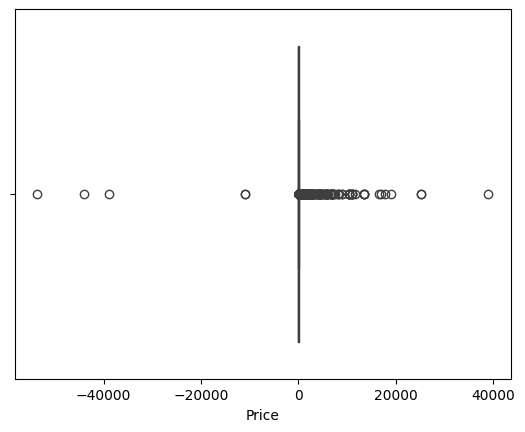

In [34]:
sns.boxplot(x='Price' , data=df_combined)

In [35]:
df_combined=df_combined[df_combined['Price']>=0]
df_combined.head()

,record_id,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice_year,invoice_month,invoice_quarter,invoice_yr_quarter,sales
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,12,4,2009 Q-4,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,4,2009 Q-4,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,12,4,2009 Q-4,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,12,4,2009 Q-4,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,12,4,2009 Q-4,30.0


In [36]:
df_combined.shape

(1033031, 14)

<Axes: xlabel='Price'>

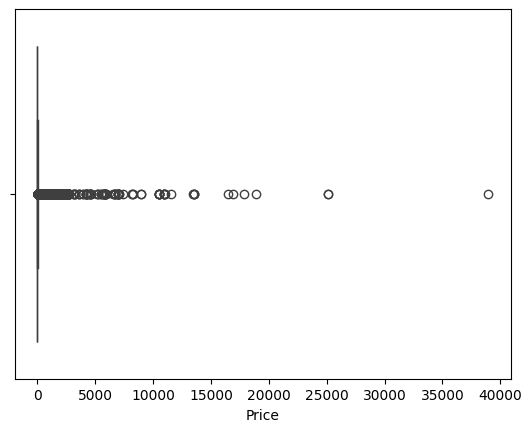

In [37]:
sns.boxplot(x='Price' , data=df_combined)

In [38]:
Q1 = df_combined['Price'].quantile(0.25)
Q3 = df_combined['Price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers_price= df_combined[(df_combined['Price'] >= (Q1 - 1.5 * IQR)) & (df_combined['Price'] <= (Q3 + 1.5 * IQR))]
df_no_outliers_price.shape

(966840, 14)

<Axes: xlabel='Price'>

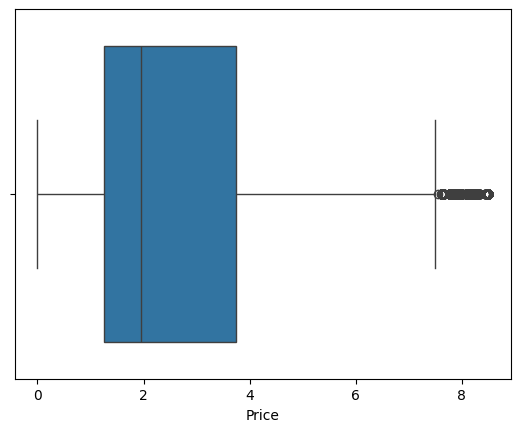

In [39]:
sns.boxplot(x='Price' , data=df_no_outliers_price)

#### Quantity column
- Converting negatives to positive
- Removing outliers

<Axes: xlabel='Quantity'>

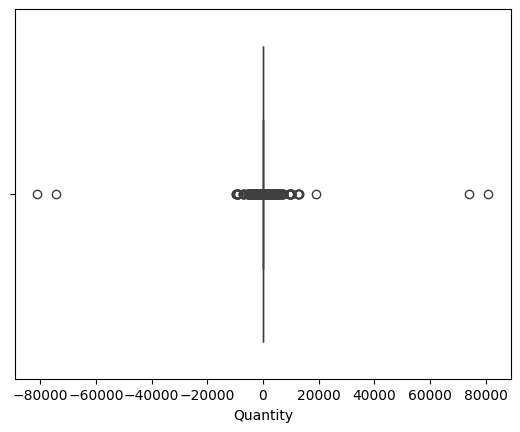

In [40]:
sns.boxplot(x='Quantity' , data=df_no_outliers_price)

In [41]:
df_no_outliers_price[df_no_outliers_price['Quantity']<=0]

,record_id,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,invoice_year,invoice_month,invoice_quarter,invoice_yr_quarter,sales
178,178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,12,4,2009 Q-4,-35.40
179,179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009,12,4,2009 Q-4,-9.90
180,180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009,12,4,2009 Q-4,-17.00
181,181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009,12,4,2009 Q-4,-12.60
182,182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009,12,4,2009 Q-4,-35.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031555,1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,2011,12,4,2011 Q-4,-168469.60
1031581,1065909,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,2011,12,4,2011 Q-4,-23.40
1031582,1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011,12,4,2011 Q-4,-9.13
1032842,1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011,12,4,2011 Q-4,-1.25


In [42]:
df_no_outliers_price['Quantity']=df_no_outliers_price['Quantity'].apply(lambda x: abs(x))
df_no_outliers_price['sales']=df_no_outliers_price['sales'].apply(lambda x: abs(x))
df_no_outliers_price.shape

<ipython-input-42-c2ad2aaaee62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_price['Quantity']=df_no_outliers_price['Quantity'].apply(lambda x: abs(x))
<ipython-input-42-c2ad2aaaee62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_price['sales']=df_no_outliers_price['sales'].apply(lambda x: abs(x))


(966840, 14)

<Axes: xlabel='Quantity'>

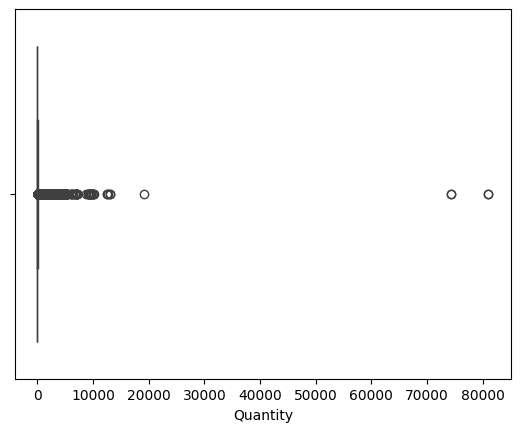

In [43]:
sns.boxplot(x='Quantity' , data=df_no_outliers_price)

In [44]:
Q1 = df_no_outliers_price['Quantity'].quantile(0.25)
Q3 = df_no_outliers_price['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers= df_no_outliers_price[(df_no_outliers_price['Quantity'] >= (Q1 - 1.5 * IQR)) & (df_no_outliers_price['Quantity'] <= (Q3 + 1.5 * IQR))]
df_no_outliers.shape

(910852, 14)

<Axes: xlabel='Quantity'>

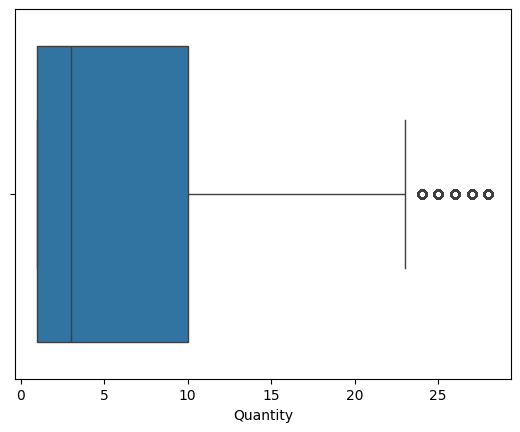

In [45]:
sns.boxplot(x='Quantity' , data=df_no_outliers)

In [46]:
df_no_outliers.describe()

,record_id,Quantity,InvoiceDate,Price,Customer ID,invoice_year,invoice_month,invoice_quarter,sales
count,9.108520e+05,910852.000000,910852,910852.000000,708107.000000,910852.000000,910852.000000,910852.000000,910852.000000
mean,5.365040e+05,6.124256,2011-01-05 12:38:18.048244736,2.708719,15339.928700,2010.439626,7.407399,2.791384,11.988563
min,0.000000e+00,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,2009.000000,1.000000,1.000000,0.000000
25%,2.646925e+05,1.000000,2010-07-07 13:14:45,1.250000,13988.000000,2010.000000,4.000000,2.000000,3.380000
50%,5.488475e+05,3.000000,2010-12-10 11:01:00,2.080000,15296.000000,2010.000000,8.000000,3.000000,8.290000
75%,8.091312e+05,10.000000,2011-07-29 13:28:00,3.750000,16809.000000,2011.000000,11.000000,4.000000,15.900000
max,1.067369e+06,28.000000,2011-12-09 12:50:00,8.500000,18287.000000,2011.000000,12.000000,4.000000,237.160000
std,3.113264e+05,6.375285,NaN,2.039706,1692.683927,0.575274,3.502711,1.145809,13.686772


#### Frequency plots
- Products

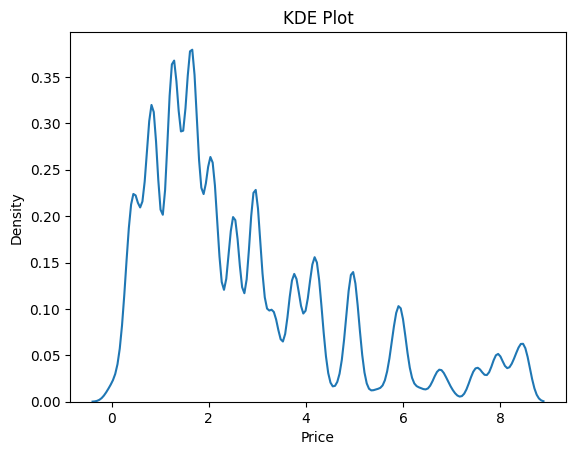

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(df_no_outliers['Price'])
plt.title('KDE Plot')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

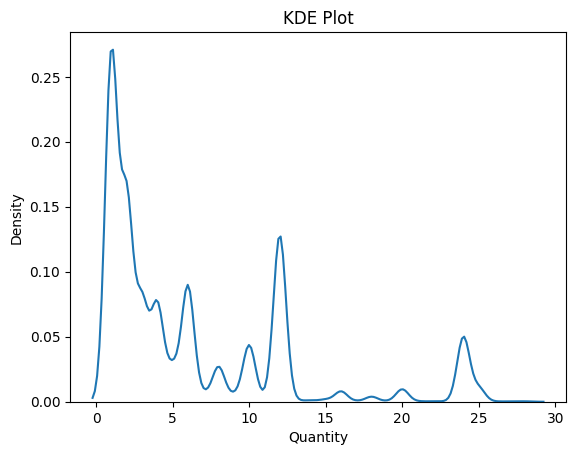

In [48]:
sns.kdeplot(df_no_outliers['Quantity'])
plt.title('KDE Plot')
plt.xlabel('Quantity')
plt.ylabel('Density')
plt.show()

### Bivariate Analysis

1. Country Vs Sales:

  a. Country Vs Total sales

  b. Country Vs Avg sales

#### Country Vs Sales

##### Top 10 countries by Total Sales


In [49]:
df_no_outliers['sales'].sum()

10919806.838000001

In [50]:
df_top_10_sales= df_no_outliers.groupby('Country').agg({'sales':'sum'}).sort_values('sales', ascending=False).reset_index().head(10)
df_top_10_sales

,Country,sales
0,United Kingdom,9607400.487
1,EIRE,292649.880
2,Germany,280935.631
3,France,213969.980
4,Switzerland,56143.210
5,Spain,49678.120
6,Netherlands,48611.910
7,Belgium,46550.290
8,Portugal,36149.820
9,Australia,27168.610


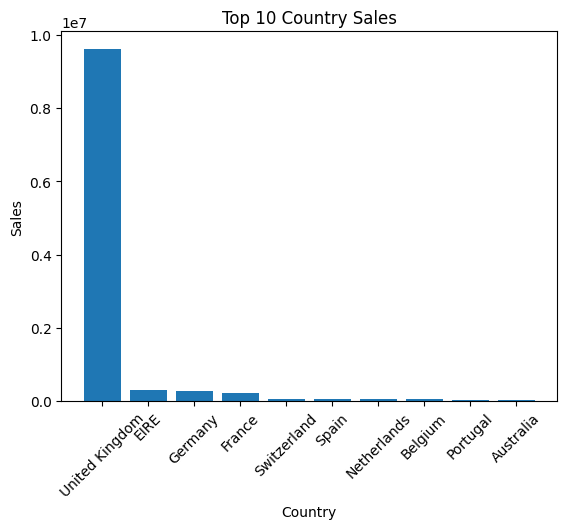

In [51]:
plt.bar(df_top_10_sales['Country'],df_top_10_sales['sales'])
plt.title('Top 10 Country Sales')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

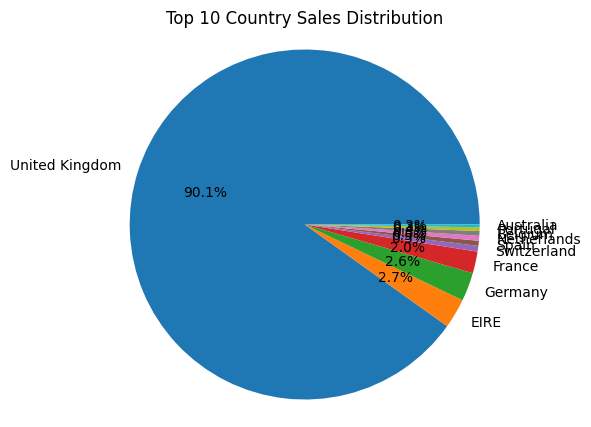

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.pie(df_top_10_sales['sales'],labels=df_top_10_sales['Country'],autopct='%1.1f%%')

plt.title('Top 10 Country Sales Distribution')
plt.axis('equal')
plt.show()

##### Top 10 countries by Avg. Sales

For Finding average sales we need the number of customers hence removing the data points with missing customer ID

In [53]:
df_without_missing_custm= df_no_outliers[df_no_outliers['Customer ID'].notna()]
df_without_missing_custm.shape

(708107, 14)

In [54]:
df_avg_sales_top_10= df_without_missing_custm.groupby('Country').agg({'sales':'sum','Customer ID':'nunique'}).reset_index().rename(columns={'Customer ID':'unique_custm'})
df_avg_sales_top_10['avg_sales']=df_avg_sales_top_10['sales']/df_avg_sales_top_10['unique_custm']
df_avg_sales_top_10.sort_values('avg_sales',ascending=False).head(10)


,Country,sales,unique_custm,avg_sales
10,EIRE,264169.710,3,88056.570000
31,Singapore,7884.610,1,7884.610000
22,Lithuania,4253.080,1,4253.080000
16,Iceland,3985.810,1,3985.810000
15,Greece,14023.710,5,2804.742000
6,Channel Islands,27079.720,10,2707.972000
14,Germany,280935.631,107,2625.566645
34,Switzerland,55558.600,22,2525.390909
24,Netherlands,48611.910,21,2314.852857
13,France,212714.640,93,2287.254194


#### Product Vs Sales

##### Top 10 Products by Total Sales


In [55]:
df_top_10_sales_product= df_no_outliers.groupby('StockCode').agg({'sales':'sum'}).sort_values('sales', ascending=False).reset_index().head(10)
df_top_10_sales_product['StockCode'] = df_top_10_sales_product['StockCode'].astype(str)
df_top_10_sales_product

,StockCode,sales
0,85123A,90135.74
1,47566,65365.79
2,85099B,59184.55
3,84879,48098.60
4,48138,45857.60
5,20685,43481.41
6,21754,42126.06
7,22139,41554.55
8,22086,41095.36
9,20725,39659.76


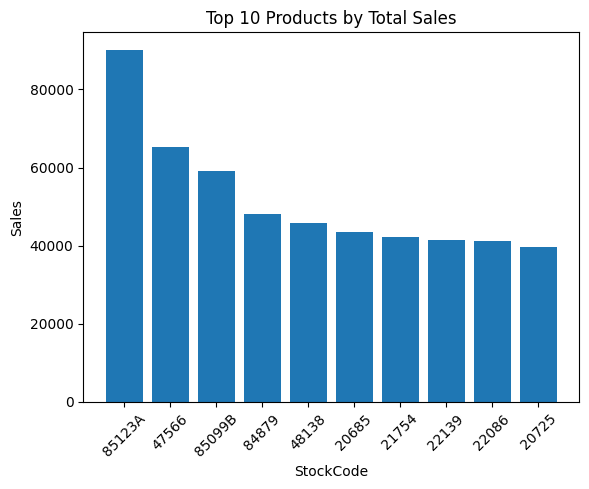

In [56]:
plt.bar(df_top_10_sales_product['StockCode'],df_top_10_sales_product['sales'])
plt.title('Top 10 Products by Total Sales')
plt.xlabel('StockCode')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

##### Top 10 Products by Average Sales


In [57]:
df_avg_sales_top_10_prod= df_without_missing_custm.groupby('StockCode').agg({'sales':'sum','Customer ID':'nunique'}).reset_index().rename(columns={'Customer ID':'unique_custm'})
df_avg_sales_top_10_prod['avg_sales']=df_avg_sales_top_10_prod['sales']/df_avg_sales_top_10_prod['unique_custm']
df_avg_sales_top_10_prod.sort_values('avg_sales',ascending=False).head(10)


,StockCode,sales,unique_custm,avg_sales
836,21681,612.00,1,612.000000
1514,22501,5562.00,18,309.000000
785,21623,612.04,2,306.020000
3539,72760B,3825.15,14,273.225000
1627,22622,3077.00,12,256.416667
1785,22796,1232.50,5,246.500000
1763,22768,1722.52,7,246.074286
3453,47570B,229.23,1,229.230000
1623,22618,1876.29,9,208.476667
2244,23315,619.40,3,206.466667


#### Customer vs Sales

##### Top 10 Customers by Total Sales


Since here customer ID is involved , using the subset of data where we have removed the records with missing Customer ID.

In [58]:

df_top_10_sales_customers= df_without_missing_custm.groupby('Customer ID').agg({'sales':'sum'}).sort_values('sales', ascending=False).reset_index().head(10)
df_top_10_sales_customers['Customer ID'] = df_top_10_sales_customers['Customer ID'].astype(str)
df_top_10_sales_customers

,Customer ID,sales
0,14911.0,195316.83
1,13089.0,71875.73
2,14156.0,60807.06
3,17841.0,55665.59
4,17850.0,50111.02
5,15311.0,46548.21
6,14298.0,46533.56
7,13081.0,39878.17
8,14096.0,38790.02
9,12748.0,35053.16


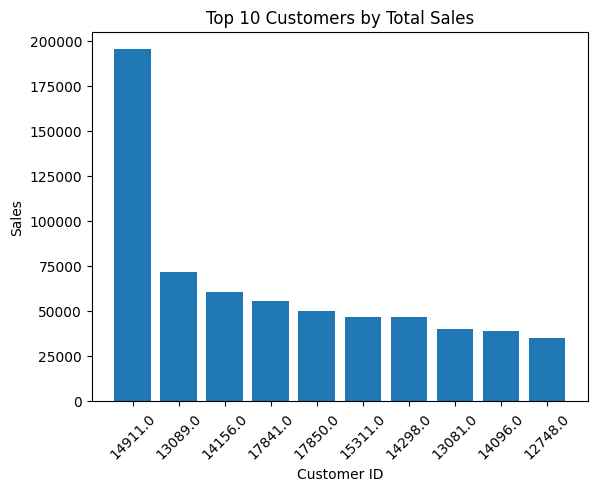

In [59]:
plt.bar(df_top_10_sales_customers['Customer ID'],df_top_10_sales_customers['sales'])
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#### Other Misc.

##### Product: Quantity vs Price vs Sales

In [60]:
df_product_agg = df_no_outliers.groupby('StockCode').agg({'Quantity':'sum','Price':'mean','sales':'sum'}).sort_values('sales', ascending=False).reset_index()
df_product_agg

,StockCode,Quantity,Price,sales
0,85123A,29670,3.174654,90135.74
1,47566,12767,5.239102,65365.79
2,85099B,27226,2.411541,59184.55
3,84879,27780,1.744329,48098.60
4,48138,6560,7.419599,45857.60
...,...,...,...,...
5070,79070B,3,0.000000,0.00
5071,79082C,2,0.000000,0.00
5072,20995,3,0.000000,0.00
5073,21005,9,0.000000,0.00


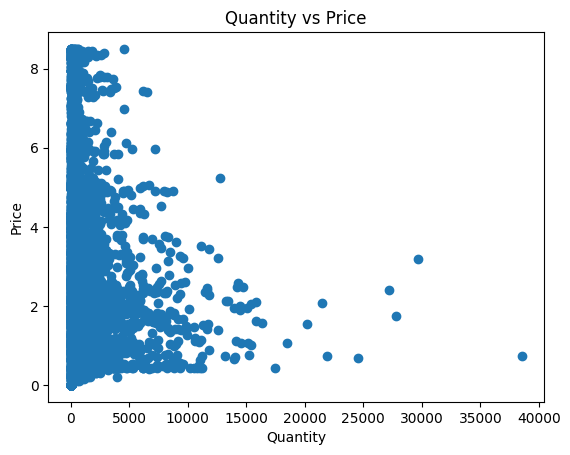

In [61]:
plt.scatter(df_product_agg['Quantity'],df_product_agg['Price'])
plt.title('Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

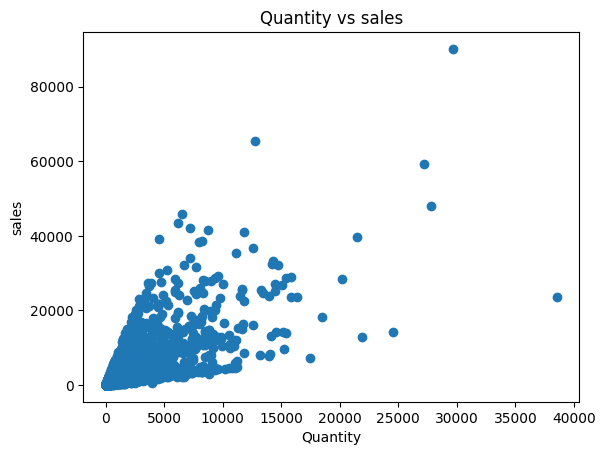

In [62]:
plt.scatter(df_product_agg['Quantity'],df_product_agg['sales'])
plt.title('Quantity vs sales')
plt.xlabel('Quantity')
plt.ylabel('sales')
plt.show()

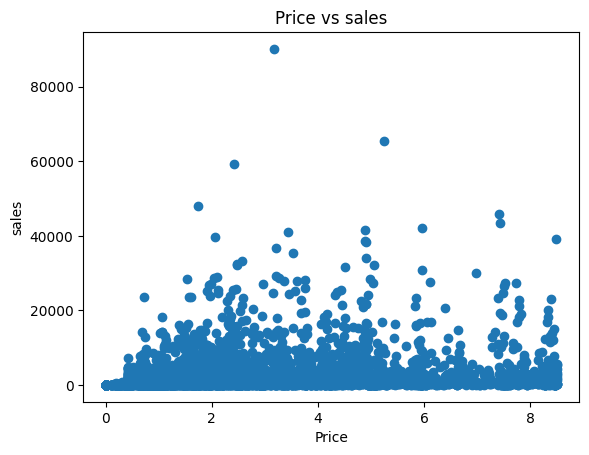

In [63]:
plt.scatter(df_product_agg['Price'],df_product_agg['sales'])
plt.title('Price vs sales')
plt.xlabel('Price')
plt.ylabel('sales')
plt.show()

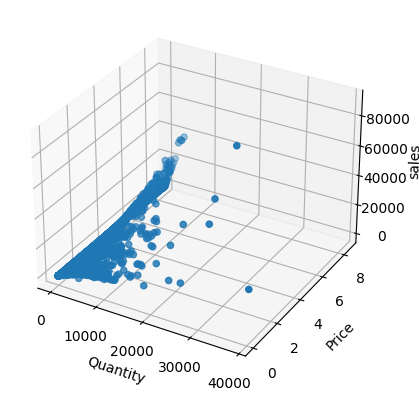

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_product_agg['Quantity'], df_product_agg['Price'], df_product_agg['sales'])
ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.set_zlabel('sales')
plt.show()


##### Country: Quantity vs Price vs Sales

In [65]:
df_no_outliers.describe()

,record_id,Quantity,InvoiceDate,Price,Customer ID,invoice_year,invoice_month,invoice_quarter,sales
count,9.108520e+05,910852.000000,910852,910852.000000,708107.000000,910852.000000,910852.000000,910852.000000,910852.000000
mean,5.365040e+05,6.124256,2011-01-05 12:38:18.048244736,2.708719,15339.928700,2010.439626,7.407399,2.791384,11.988563
min,0.000000e+00,1.000000,2009-12-01 07:45:00,0.000000,12346.000000,2009.000000,1.000000,1.000000,0.000000
25%,2.646925e+05,1.000000,2010-07-07 13:14:45,1.250000,13988.000000,2010.000000,4.000000,2.000000,3.380000
50%,5.488475e+05,3.000000,2010-12-10 11:01:00,2.080000,15296.000000,2010.000000,8.000000,3.000000,8.290000
75%,8.091312e+05,10.000000,2011-07-29 13:28:00,3.750000,16809.000000,2011.000000,11.000000,4.000000,15.900000
max,1.067369e+06,28.000000,2011-12-09 12:50:00,8.500000,18287.000000,2011.000000,12.000000,4.000000,237.160000
std,3.113264e+05,6.375285,NaN,2.039706,1692.683927,0.575274,3.502711,1.145809,13.686772


In [66]:
df_country_agg = df_no_outliers.groupby('Country').agg({'Quantity':'sum','Price':'mean','sales':'sum'}).sort_values('sales', ascending=False).reset_index()
df_country_agg.head(10)

,Country,Quantity,Price,sales
0,United Kingdom,4874959,2.719396,9607400.487
1,EIRE,145633,2.885954,292649.880
2,Germany,157019,2.431049,280935.631
3,France,125479,2.341726,213969.980
4,Switzerland,30053,2.577068,56143.210
5,Spain,29365,2.449881,49678.120
6,Netherlands,21454,2.435752,48611.910
7,Belgium,27170,2.470496,46550.290
8,Portugal,20470,2.426448,36149.820
9,Australia,11110,2.986436,27168.610


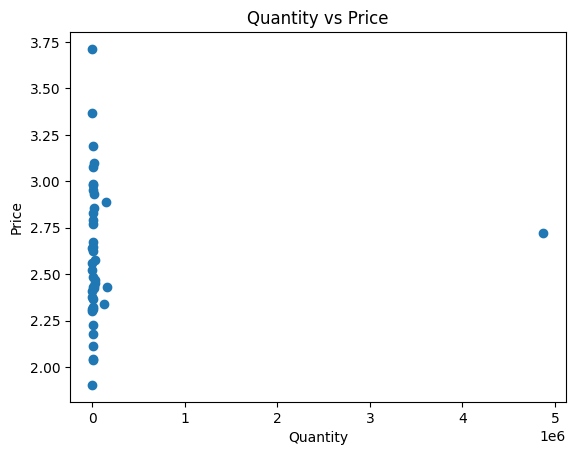

In [67]:
plt.scatter(df_country_agg['Quantity'],df_country_agg['Price'])
plt.title('Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

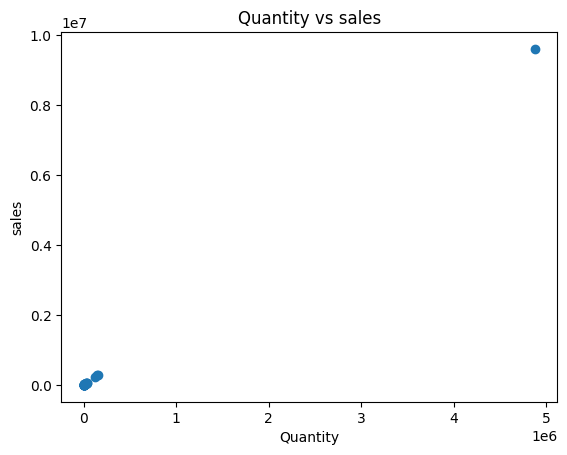

In [68]:
plt.scatter(df_country_agg['Quantity'],df_country_agg['sales'])
plt.title('Quantity vs sales')
plt.xlabel('Quantity')
plt.ylabel('sales')
plt.show()

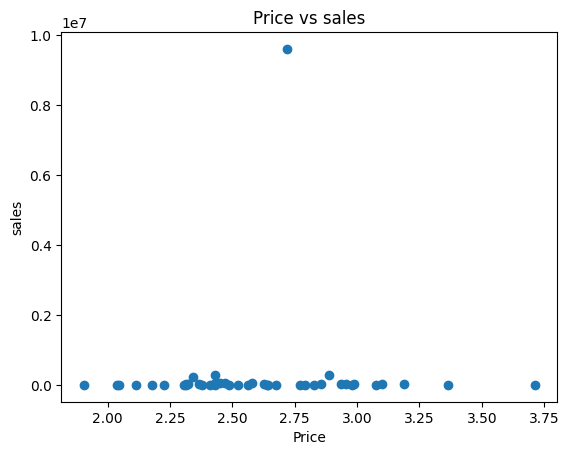

In [69]:
plt.scatter(df_country_agg['Price'],df_country_agg['sales'])
plt.title('Price vs sales')
plt.xlabel('Price')
plt.ylabel('sales')
plt.show()

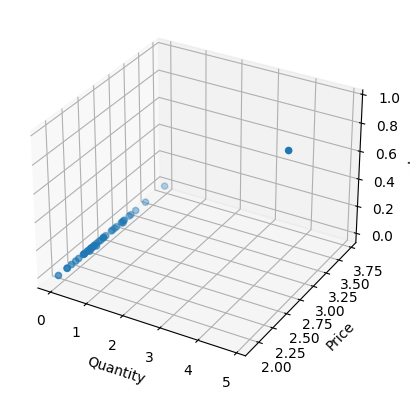

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_country_agg['Quantity'], df_country_agg['Price'], df_country_agg['sales'])
ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.set_zlabel('sales')
plt.show()


##### Categorical vs Categorical values
Top 10 vs Top 10 (By total sales)
- Country vs Product
- Country vs Customer
- Product vs Customer

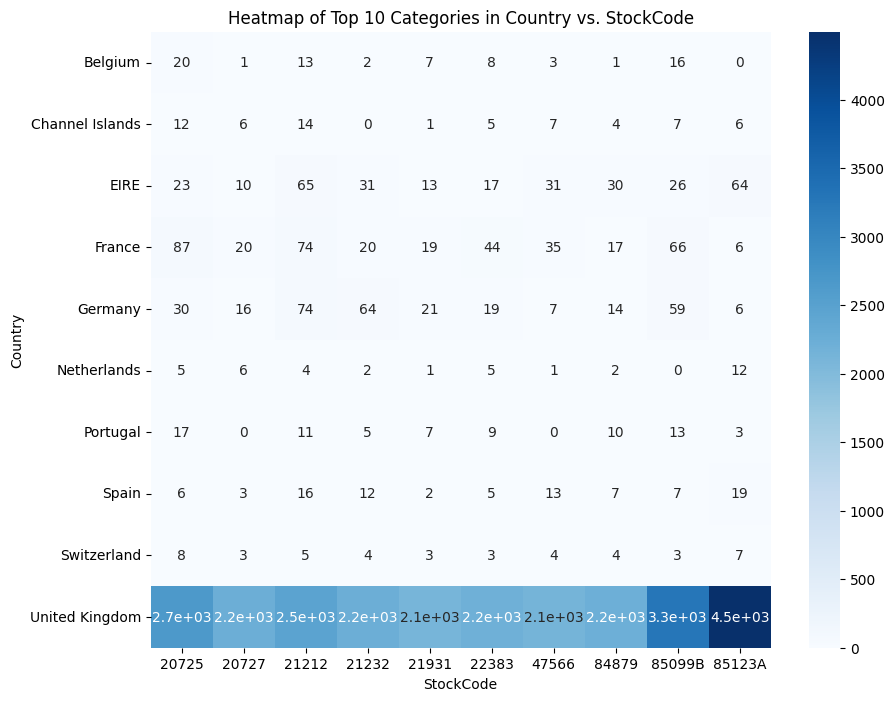

In [71]:
top_10_Country = df_no_outliers['Country'].value_counts().nlargest(10).index
top_10_StockCode = df_no_outliers['StockCode'].value_counts().nlargest(10).index

df_filtered = df_no_outliers[df_no_outliers['Country'].isin(top_10_Country) & df_no_outliers['StockCode'].isin(top_10_StockCode)]

crosstab = pd.crosstab(df_filtered['Country'], df_filtered['StockCode'])

plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap='Blues')
plt.title('Heatmap of Top {} Categories in Country vs. StockCode'.format(10))
plt.xlabel('StockCode')
plt.ylabel('Country')
plt.show()

Since the data is heavily based on UK customers, lets focus this section towards it.

In [72]:
df_only_uk_custm =df_no_outliers[df_no_outliers['Country']=='United Kingdom']

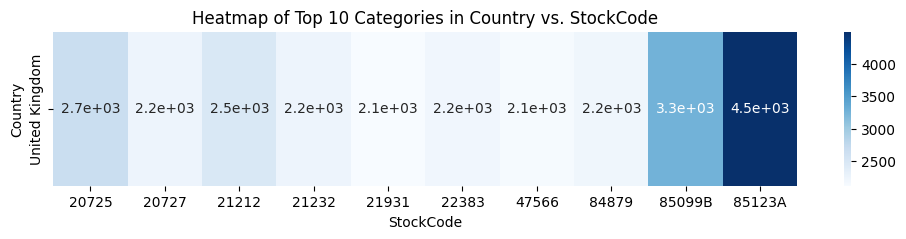

In [73]:
top_10_Country = df_only_uk_custm['Country'].value_counts().nlargest(10).index
top_10_StockCode = df_only_uk_custm['StockCode'].value_counts().nlargest(10).index

df_filtered = df_only_uk_custm[df_only_uk_custm['Country'].isin(top_10_Country) & df_only_uk_custm['StockCode'].isin(top_10_StockCode)]

crosstab = pd.crosstab(df_filtered['Country'], df_filtered['StockCode'])

plt.figure(figsize=(12, 2))
sns.heatmap(crosstab, annot=True, cmap='Blues')
plt.title('Heatmap of Top {} Categories in Country vs. StockCode'.format(10))
plt.xlabel('StockCode')
plt.ylabel('Country')
plt.show()

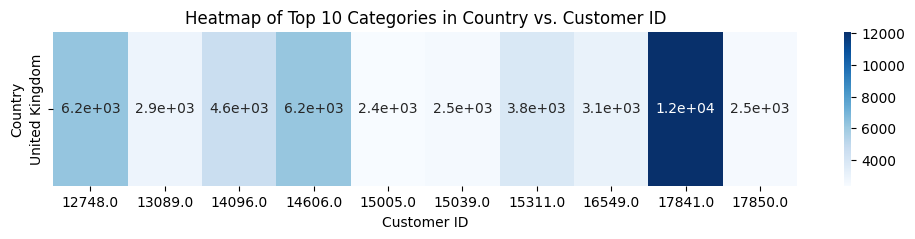

In [74]:
top_10_Country = df_only_uk_custm['Country'].value_counts().nlargest(10).index
top_10_custm = df_only_uk_custm['Customer ID'].value_counts().nlargest(10).index

df_filtered = df_only_uk_custm[df_only_uk_custm['Country'].isin(top_10_Country) & df_only_uk_custm['Customer ID'].isin(top_10_custm)]

crosstab = pd.crosstab(df_filtered['Country'], df_filtered['Customer ID'])

plt.figure(figsize=(12, 2))
sns.heatmap(crosstab, annot=True, cmap='Blues')
plt.title('Heatmap of Top {} Categories in Country vs. Customer ID'.format(10))
plt.xlabel('Customer ID')
plt.ylabel('Country')
plt.show()

#### Time period vs Sales
Factors that could be influencing the Sales Trends
- Seasonality
- Promotions and Sales Events
- Holiday Season
- Trending Products
- Inventory Levels

##### YoY Total Sales Growth

In [75]:
df_tot_sales_yoy= df_no_outliers.groupby('invoice_year').agg({'sales':'sum'}).sort_values('invoice_year', ascending=True)
df_tot_sales_yoy

,sales
invoice_year,
2009,464280.470
2010,5251691.124
2011,5203835.244


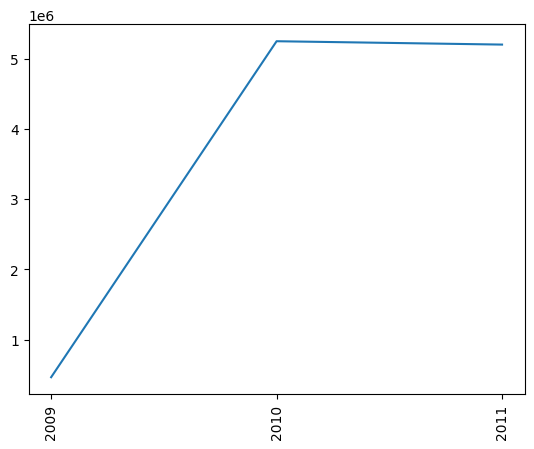

In [76]:
plt.plot(df_tot_sales_yoy.index,df_tot_sales_yoy['sales'])
plt.xticks(df_tot_sales_yoy.index[::1],rotation=90)
plt.show()

##### QoQ Total Sales Growth

In [77]:
df_tot_sales_qoq= df_no_outliers.groupby('invoice_yr_quarter').agg({'sales':'sum'}).sort_values('invoice_yr_quarter', ascending=True)
df_tot_sales_qoq

,sales
invoice_yr_quarter,
2009 Q-4,464280.470
2010 Q-1,1042832.249
2010 Q-2,1146309.482
2010 Q-3,1189536.181
2010 Q-4,1873013.212
2011 Q-1,1012281.520
2011 Q-2,1101686.731
2011 Q-3,1360858.173
2011 Q-4,1729008.820


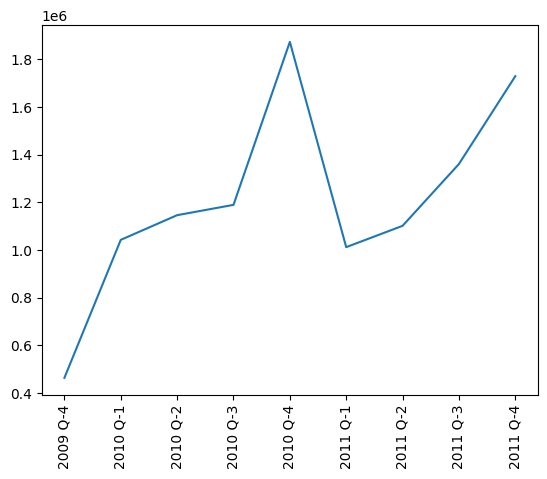

In [78]:
plt.plot(df_tot_sales_qoq.index,df_tot_sales_qoq['sales'])
plt.xticks(rotation=90)
plt.show()

##### Best Quarter for Sales

In [79]:
df_tot_sales_all_quarters= df_no_outliers.groupby('invoice_quarter').agg({'sales':'sum'}).sort_values('invoice_quarter', ascending=True)
df_tot_sales_all_quarters

,sales
invoice_quarter,
1,2055113.769
2,2247996.213
3,2550394.354
4,4066302.502


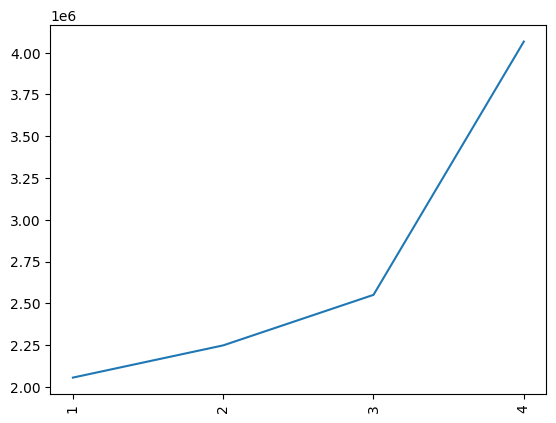

In [80]:
plt.plot(df_tot_sales_all_quarters.index,df_tot_sales_all_quarters['sales'])
plt.xticks(df_tot_sales_all_quarters.index[::1],rotation=90)
plt.show()

In [81]:
df_tot_sales_all_months= df_no_outliers.groupby('invoice_month').agg({'sales':'sum'}).sort_values('invoice_month', ascending=True)
df_tot_sales_all_months

,sales
invoice_month,
1,658718.202
2,597900.326
3,798495.241
4,672170.913
5,797005.230
6,778820.070
7,739208.941
8,749210.470
9,1061974.943


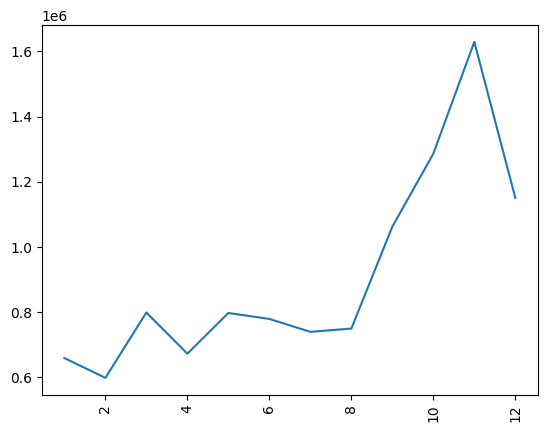

In [82]:
plt.plot(df_tot_sales_all_months.index,df_tot_sales_all_months['sales'])
plt.xticks(rotation=90)
plt.show()

### Mutivariate Analysis

In [83]:
import pandas as pd

In [84]:
df_no_outliers_wo_UK = df_no_outliers[df_no_outliers['Country']!='United Kingdom']

In [85]:
df_top_10_sales= df_no_outliers_wo_UK.groupby('Country').agg({'sales':'sum'}).sort_values('sales', ascending=False).reset_index().head(10)
df_top_10_sales['Country'].unique()

array(['EIRE', 'Germany', 'France', 'Switzerland', 'Spain', 'Netherlands',
       'Belgium', 'Portugal', 'Australia', 'Channel Islands'],
      dtype=object)

In [86]:
df_top_10_country_sales_qoq= df_no_outliers.groupby(['Country','invoice_yr_quarter']).agg({'sales':'sum'}).reset_index().sort_values(['Country','invoice_yr_quarter'], ascending=True)
df_top_10_country_sales_qoq=df_top_10_country_sales_qoq[df_top_10_country_sales_qoq['Country'].isin(df_top_10_sales['Country'].unique())]
df_top_10_country_sales_qoq

,Country,invoice_yr_quarter,sales
0,Australia,2009 Q-4,491.95
1,Australia,2010 Q-1,1024.05
2,Australia,2010 Q-2,3724.78
3,Australia,2010 Q-3,1306.45
4,Australia,2010 Q-4,5568.34
...,...,...,...
226,Switzerland,2010 Q-4,9387.06
227,Switzerland,2011 Q-1,5222.89
228,Switzerland,2011 Q-2,6513.84
229,Switzerland,2011 Q-3,9946.56


In [87]:
df_top_10_country_sales_qoq['Country'].unique()

array(['Australia', 'Belgium', 'Channel Islands', 'EIRE', 'France',
       'Germany', 'Netherlands', 'Portugal', 'Spain', 'Switzerland'],
      dtype=object)

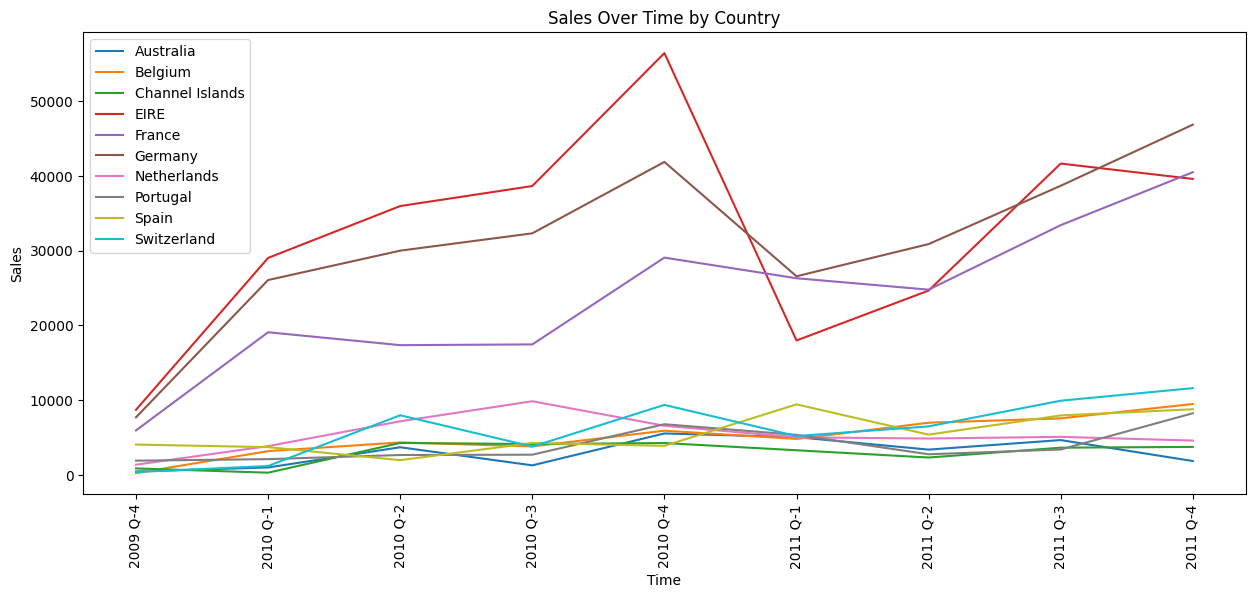

In [88]:
import matplotlib.pyplot as plt

unique_countries = df_top_10_country_sales_qoq['Country'].unique()

plt.figure(figsize=(15, 6))
for country in unique_countries:
    country_sales = df_top_10_country_sales_qoq[df_top_10_country_sales_qoq['Country'] == country]

    plt.plot(country_sales.invoice_yr_quarter, country_sales['sales'], label=country)

plt.title('Sales Over Time by Country')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.legend()
plt.show()
print('\n')


#### Growth rate total sales for countries with sales above 20000

In [89]:
import pandas as pd

df_total_sales = df_no_outliers.groupby(['Country'])['sales'].sum().reset_index()
df_abv_3000_country_list = df_total_sales[df_total_sales['sales']>=20000]['Country'].unique()

df_abv_3000= df_no_outliers[df_no_outliers['Country'].isin(df_abv_3000_country_list)]

grouped = df_abv_3000.groupby(['Country', 'invoice_yr_quarter'])['sales'].sum().reset_index()

pivoted = grouped.pivot(index='Country', columns='invoice_yr_quarter', values='sales')

growth = pivoted.pct_change(axis=1) * 100

growth

invoice_yr_quarter,2009 Q-4,2010 Q-1,2010 Q-2,2010 Q-3,2010 Q-4,2011 Q-1,2011 Q-2,2011 Q-3,2011 Q-4
Country,,,,,,,,,
Australia,NaN,108.161399,263.730287,-64.925445,326.219143,-8.821480,-32.853403,37.382668,-59.790031
Belgium,NaN,1084.452245,36.224935,-12.103073,54.720786,-18.594583,44.906372,8.263247,25.320753
Channel Islands,NaN,-63.719655,1221.569892,-3.468621,3.309573,-22.554680,-29.221184,55.938712,2.868067
EIRE,NaN,232.512760,23.880528,7.437289,45.989332,-68.092170,37.059318,68.807661,-4.925512
France,NaN,219.376098,-9.024348,0.568425,66.395051,-9.487537,-5.789308,34.768755,21.192805
Germany,NaN,237.441681,15.052386,7.726978,29.524519,-36.512787,16.195465,25.243401,21.113074
Italy,NaN,103.854227,280.475387,-67.810372,660.250362,-42.639867,-69.673738,57.068812,257.117078
Netherlands,NaN,178.157224,85.562372,37.257955,-33.145004,-23.486545,-3.152919,4.591281,-9.704295
Norway,NaN,0.000000,0.000000,245.420010,406.991397,-79.967035,271.568806,80.852321,8.789180


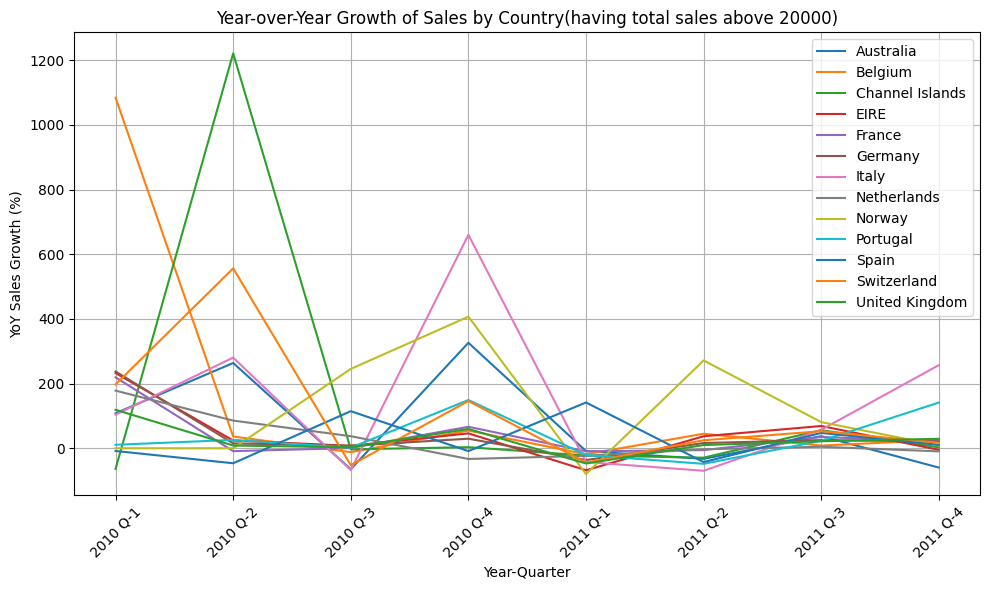

In [90]:
plt.figure(figsize=(10, 6))

for country in growth.index:
    plt.plot(growth.columns, growth.loc[country], label=country)

plt.title('Year-over-Year Growth of Sales by Country(having total sales above 20000)')
plt.xlabel('Year-Quarter')
plt.ylabel('YoY Sales Growth (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [91]:
total_growth= growth.reset_index()
total_growth['avg_growth_rate']  =(total_growth['2010 Q-1']+total_growth['2010 Q-2']+total_growth['2010 Q-3']+total_growth['2010 Q-4']+total_growth['2011 Q-1']+total_growth['2011 Q-2']+total_growth['2011 Q-3']+total_growth['2011 Q-4'])/8

##### Emerging Markets
- Good performing markets with potential of high growth (those with high avg_growth_rate)

In [92]:
total_growth

invoice_yr_quarter,Country,2009 Q-4,2010 Q-1,2010 Q-2,2010 Q-3,2010 Q-4,2011 Q-1,2011 Q-2,2011 Q-3,2011 Q-4,avg_growth_rate
0,Australia,NaN,108.161399,263.730287,-64.925445,326.219143,-8.821480,-32.853403,37.382668,-59.790031,71.137892
1,Belgium,NaN,1084.452245,36.224935,-12.103073,54.720786,-18.594583,44.906372,8.263247,25.320753,152.898835
2,Channel Islands,NaN,-63.719655,1221.569892,-3.468621,3.309573,-22.554680,-29.221184,55.938712,2.868067,145.590263
3,EIRE,NaN,232.512760,23.880528,7.437289,45.989332,-68.092170,37.059318,68.807661,-4.925512,42.833651
4,France,NaN,219.376098,-9.024348,0.568425,66.395051,-9.487537,-5.789308,34.768755,21.192805,39.749993
5,Germany,NaN,237.441681,15.052386,7.726978,29.524519,-36.512787,16.195465,25.243401,21.113074,39.473090
6,Italy,NaN,103.854227,280.475387,-67.810372,660.250362,-42.639867,-69.673738,57.068812,257.117078,147.330236
7,Netherlands,NaN,178.157224,85.562372,37.257955,-33.145004,-23.486545,-3.152919,4.591281,-9.704295,29.510009
8,Norway,NaN,0.000000,0.000000,245.420010,406.991397,-79.967035,271.568806,80.852321,8.789180,116.706835
9,Portugal,NaN,10.697118,25.783915,1.556524,149.220479,-20.895520,-48.223925,22.918439,141.379693,35.304590


#### Growth rate total sales for Products with sales above 35000

In [93]:
import pandas as pd

df_total_sales = df_no_outliers.groupby(['StockCode'])['sales'].sum().reset_index()
df_abv_3000_country_list = df_total_sales[df_total_sales['sales']>=35000]['StockCode'].unique()

df_abv_3000= df_no_outliers[df_no_outliers['StockCode'].isin(df_abv_3000_country_list)]

grouped = df_abv_3000.groupby(['StockCode', 'invoice_yr_quarter'])['sales'].sum().reset_index()

pivoted = grouped.pivot(index='StockCode', columns='invoice_yr_quarter', values='sales')

growth2 = pivoted.pct_change(axis=1) * 100

growth2

invoice_yr_quarter,2009 Q-4,2010 Q-1,2010 Q-2,2010 Q-3,2010 Q-4,2011 Q-1,2011 Q-2,2011 Q-3,2011 Q-4
StockCode,,,,,,,,,
20685,NaN,257.320048,-12.806613,6.908850,7.845790,-31.960714,-18.205894,4.801095,-6.602984
20725,NaN,261.672313,45.814848,8.998215,-22.270859,-16.373683,49.036324,10.418860,-16.190735
21621,NaN,313.114754,169.647292,-47.167904,-50.835655,40.758207,-10.038002,-23.942887,-25.582828
21754,NaN,286.082084,-18.233536,20.464485,5.452019,-34.677425,-19.801938,-23.800507,-9.343390
22086,NaN,-96.549184,34.593072,685.198979,648.066767,-98.601661,2.481149,2109.256774,232.573269
22112,NaN,-53.229104,-45.665722,210.755251,315.338031,-90.989070,-33.932765,350.027142,192.633725
22138,NaN,98.140703,-14.287682,19.210292,-46.619460,5.048482,-6.711216,4.323628,155.028650
22139,NaN,-18.556611,131.581871,-0.498256,32.644337,-59.620668,41.110476,15.335444,42.875227
22457,NaN,NaN,-27.038160,132.549374,69.903790,-29.270354,-21.706940,14.364319,17.614409


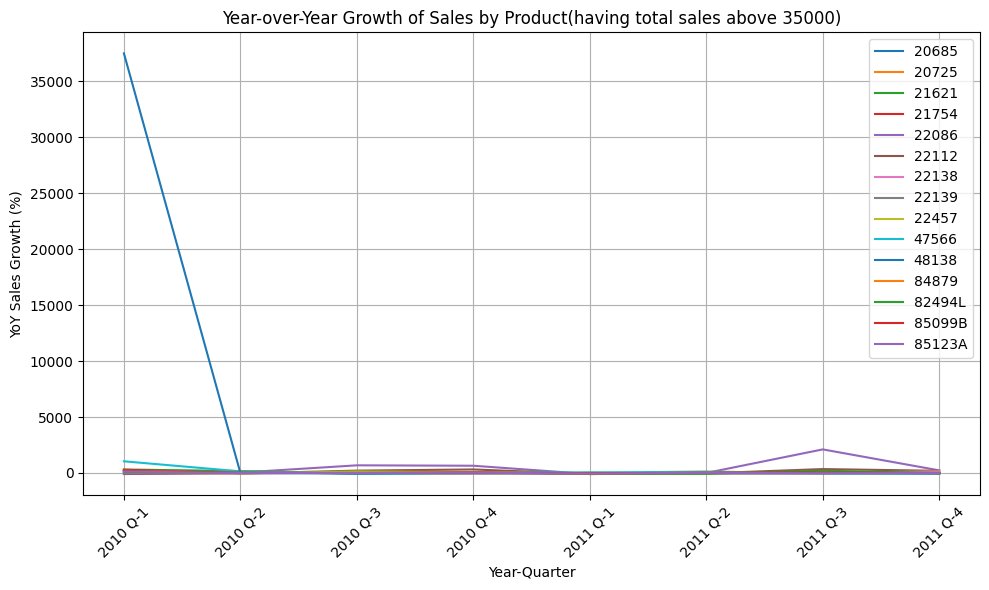

In [94]:
plt.figure(figsize=(10, 6))

for country in growth2.index:
    plt.plot(growth2.columns, growth2.loc[country], label=country)

plt.title('Year-over-Year Growth of Sales by Product(having total sales above 35000)')
plt.xlabel('Year-Quarter')
plt.ylabel('YoY Sales Growth (%)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### High potential products
- Good performing products with high potential of growth (those with high avg_growth_rate)

In [95]:
total_growth= growth2.reset_index()
total_growth['avg_growth_rate']  =(total_growth['2010 Q-1']+total_growth['2010 Q-2']+total_growth['2010 Q-3']+total_growth['2010 Q-4']+total_growth['2011 Q-1']+total_growth['2011 Q-2']+total_growth['2011 Q-3']+total_growth['2011 Q-4'])/8
total_growth

invoice_yr_quarter,StockCode,2009 Q-4,2010 Q-1,2010 Q-2,2010 Q-3,2010 Q-4,2011 Q-1,2011 Q-2,2011 Q-3,2011 Q-4,avg_growth_rate
0,20685,NaN,257.320048,-12.806613,6.908850,7.845790,-31.960714,-18.205894,4.801095,-6.602984,25.912447
1,20725,NaN,261.672313,45.814848,8.998215,-22.270859,-16.373683,49.036324,10.418860,-16.190735,40.138160
2,21621,NaN,313.114754,169.647292,-47.167904,-50.835655,40.758207,-10.038002,-23.942887,-25.582828,45.744122
3,21754,NaN,286.082084,-18.233536,20.464485,5.452019,-34.677425,-19.801938,-23.800507,-9.343390,25.767724
4,22086,NaN,-96.549184,34.593072,685.198979,648.066767,-98.601661,2.481149,2109.256774,232.573269,439.627396
5,22112,NaN,-53.229104,-45.665722,210.755251,315.338031,-90.989070,-33.932765,350.027142,192.633725,105.617186
6,22138,NaN,98.140703,-14.287682,19.210292,-46.619460,5.048482,-6.711216,4.323628,155.028650,26.766675
7,22139,NaN,-18.556611,131.581871,-0.498256,32.644337,-59.620668,41.110476,15.335444,42.875227,23.108977
8,22457,NaN,NaN,-27.038160,132.549374,69.903790,-29.270354,-21.706940,14.364319,17.614409,NaN
9,47566,NaN,1044.255277,143.700023,-75.942688,48.789407,25.201437,130.621047,-18.321450,-64.815568,154.185936


### Save Data as csv

In [96]:
# df_no_outliers.to_csv('df_no_outliers.csv', index=False)